In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/processed_data.csv'

In [ ]:
import tensorflow as tf
dn = tf.test.gpu_device_name()
if dn != '/device:GPU:0':
  raise SystemError ('gpu not found')
print('gpu found ar : {}'.format(dn))

gpu found ar : /device:GPU:0


In [ ]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from tabulate import tabulate
import random

%matplotlib inline

In [ ]:
new_data = pd.read_csv(path)

In [ ]:
new_data.head()

,Unnamed: 0,UserId,IsCorrect,CorrectAnswer,AnswerValue,Gender,PremiumPupil,HourAnswered,MonthAnswered,YearAnswered,...,Age_mean_on_yr_mth,Age_std_on_yr_mth,Age_max_on_yr_mth,Age_min_on_yr_mth,Year_Month_int,l_QuestionId,l_AnswerId,l_GroupId,l_QiuzId,l_SchemeOfWorkId
0,0,65967.0,0.0,4.0,2.0,1.0,0.0,13.0,4.0,2019.0,...,14.470042,1.991865,18.0,6.0,0.0,9.740792,16.337489,8.522380,9.641538,9.036939
1,1,50013.0,0.0,3.0,1.0,1.0,1.0,18.0,11.0,2018.0,...,13.680786,1.605366,36.0,5.0,1.0,9.674766,16.425492,8.512181,9.754175,10.248070
2,2,87935.0,1.0,4.0,4.0,1.0,1.0,22.0,5.0,2019.0,...,14.327149,2.099209,37.0,6.0,2.0,9.978966,16.677026,8.296547,8.607948,10.248070
3,3,77530.0,0.0,2.0,3.0,1.0,1.0,21.0,11.0,2018.0,...,13.680786,1.605366,36.0,5.0,1.0,9.677966,16.252204,9.006141,9.216521,9.037533
4,4,99529.0,0.0,3.0,4.0,2.0,0.0,21.0,12.0,2018.0,...,13.608579,1.793765,36.0,5.0,3.0,9.934986,16.318109,8.115521,6.369901,9.038959


In [ ]:
new_data.drop('Unnamed: 0', axis = 1, inplace= True)

Selecting 100k i.e 24% of the data sets

```

```



In [ ]:
def frac(dataframe, fraction, other_info=None):
  """Returns Fractions of the Data"""
  return dataframe.sample(frac = fraction)

In [ ]:
random.seed(1000)
df = frac(new_data, 0.02392)

In [ ]:
df.shape

(100032, 34)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100032 entries, 1265942 to 2368804
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   UserId                100032 non-null  float64
 1   IsCorrect             100032 non-null  float64
 2   CorrectAnswer         100032 non-null  float64
 3   AnswerValue           100032 non-null  float64
 4   Gender                100032 non-null  float64
 5   PremiumPupil          100032 non-null  float64
 6   HourAnswered          100032 non-null  float64
 7   MonthAnswered         100032 non-null  float64
 8   YearAnswered          100032 non-null  float64
 9   Day of Week Answered  100032 non-null  float64
 10  YearBirth             100032 non-null  float64
 11  Age                   100032 non-null  float64
 12  poly1_0               100032 non-null  float64
 13  poly1_1               100032 non-null  float64
 14  poly1_2               100032 non-null  float6

In [ ]:
df['IsCorrect'].value_counts()

1.0    55679
0.0    44353
Name: IsCorrect, dtype: int64

# Splitting Datasets And Performing Standard Scaler

In [ ]:
X = df.drop(['UserId','IsCorrect'], axis=1)
y = df['IsCorrect']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_scaled= scaler.fit_transform(X)
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.45, random_state = 10)

 ## MODELLING

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, f1_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,f1_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# from sklearn.grid_search import GridSearchCV

NB_mod = GaussianNB() #for continuous or numerical features.
NB_mod = BernoulliNB() #for features with binary values
dt= DecisionTreeClassifier()
# logreg = LogisticRegression()

### 1. LINEAR SVM

In [ ]:
svm_lin_mod = svm.LinearSVC(class_weight = {0:0.70, 1:0.30}, C = 10) 
svm_lin_mod.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=10, class_weight={0: 0.7, 1: 0.3})

In [ ]:
y_pred_lin = svm_lin_mod.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_lin))
print('Total accuracy: %.5f' % accuracy_score(y_test, y_pred_lin))
print(classification_report(y_test, y_pred_lin))
print(confusion_matrix(y_test, y_pred_lin))

0.6734644007553038
Total accuracy: 0.67346
              precision    recall  f1-score   support

         0.0       0.59      0.91      0.71     19998
         1.0       0.87      0.49      0.62     25017

    accuracy                           0.67     45015
   macro avg       0.73      0.70      0.67     45015
weighted avg       0.74      0.67      0.66     45015

[[18123  1875]
 [12824 12193]]


In [ ]:
#We would define a function to print out the confusion matrix and other metric with the necessary formatting

def print_metrics(labels, predictions):
    metrics = sklm.precision_recall_fscore_support(labels, predictions)
    conf = sklm.confusion_matrix(labels, predictions)
    print('                 Confusion matrix')
    print('                 Actual positive    Actual negative')
    print('Score positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Score negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, y_pred_lin)

                 Confusion matrix
                 Actual positive    Actual negative
Score positive     18123              1875
Score negative     12824             12193

Accuracy  0.67
 
           Positive      Negative
Num case    19998         25017
Precision    0.59          0.87
Recall       0.91          0.49
F1           0.71          0.62


In [ ]:
prob_lin = svm_lin_mod._predict_proba_lr(X_test)
print(prob_lin[:5,:])

[[0.30667468 0.69332532]
 [0.65667302 0.34332698]
 [0.31506503 0.68493497]
 [0.7191255  0.2808745 ]
 [0.69779313 0.30220687]]


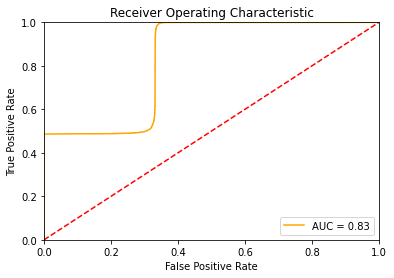

In [ ]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, prob_lin)

2. RBF KERNEL SVM

In [ ]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [0.1, 1], "gamma":[1.0/50.0]}
## Define the SVM model
svc_clf = svm.SVC(class_weight = {0:0.55, 1:0.45}) 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(x_scaled, y)
print(clf.best_estimator_.C)
print(clf.best_estimator_.gamma)

1
0.02


In [ ]:
# nr.seed(1115)
svm_mod = svm.SVC(C = clf.best_estimator_.C,
                  gamma = clf.best_estimator_.gamma,
                  class_weight = {0:0.55, 1:0.45},
                  probability=True) 
svm_mod.fit(X_train, y_train)

SVC(C=1, class_weight={0: 0.55, 1: 0.45}, gamma=0.02, probability=True)

In [ ]:
y_pred_rbf = svm_mod.predict(X_test)

In [ ]:
#Printing the metrics
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = svm_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     19923                 0
Actual negative        20             25072

Accuracy        1.00
F1 Score        1.00
AUC             1.00
Macro precision 1.00
Macro recall    1.00
 
           Positive      Negative
Num case    19923         25092
Precision    1.00          1.00
Recall       1.00          1.00
F1           1.00          1.00


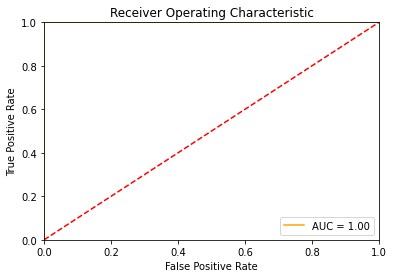

In [ ]:
#Printing AUC 
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)

# 3 USING POLY KERNEL SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.45, random_state = 10)

In [ ]:
svm_poly_mod = svm.SVC(kernel='poly',class_weight = {0:0.55, 1:0.45}, C=2,probability=True)
svm_poly_mod.fit(X_train, y_train)

SVC(C=2, class_weight={0: 0.55, 1: 0.45}, kernel='poly', probability=True)

In [ ]:
y_pred_poly = svm_poly_mod.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred_poly))
print('Total accuracy: %.5f' % accuracy_score(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))
print(confusion_matrix(y_test, y_pred_poly))

0.7341774963900922
Total accuracy: 0.73418
              precision    recall  f1-score   support

         0.0       0.64      0.92      0.75     19923
         1.0       0.90      0.59      0.71     25092

    accuracy                           0.73     45015
   macro avg       0.77      0.75      0.73     45015
weighted avg       0.79      0.73      0.73     45015

[[18318  1605]
 [10361 14731]]


In [ ]:
#We would define a function to print out the confusion matrix and other metric with the necessary formatting

def print_metrics(labels, predictions):
    metrics = sklm.precision_recall_fscore_support(labels, predictions)
    conf = sklm.confusion_matrix(labels, predictions)
    print('                 Confusion matrix')
    print('                 Actual positive    Actual negative')
    print('Score positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Score negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, predictions))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, predictions))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, y_pred_poly)

                 Confusion matrix
                 Actual positive    Actual negative
Score positive     18318              1605
Score negative     10361             14731

Accuracy  0.73
 
           Positive      Negative
Num case    19923         25092
Precision    0.64          0.90
Recall       0.92          0.59
F1           0.75          0.71


In [ ]:
prob_poly = svm_poly_mod.predict_proba(X_test)
print(prob_poly[:5,:])

[[0.38652298 0.61347702]
 [0.10860607 0.89139393]
 [0.60816403 0.39183597]
 [0.69421234 0.30578766]
 [0.055161   0.944839  ]]


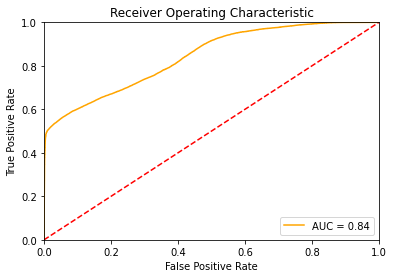

In [ ]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, prob_poly)

SVM with Linear Kernel SEEMS to outperform RBF an accuracy of 67%. This tells that our datasets contains two different classes that can be sepearted with a hyperplane. However Poly Kernel recorded accuracy of 73% which out permform both linear and rbf. 
The overfitting of rbf would have been as a result of the paiwise distance between the samples.


WITHOUT USING FEATURES SELECTION SVM with RBF KERNEL OVERFITTED, Hence we can do fearture selection or importance to help us improve the model

In [ ]:
# SVM WITH FEATURE SELECTION USING CORRELATION 
correlations = df.corr().unstack().sort_values(ascending=False) # Build correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Convert to dataframe
correlations.columns = ['col1', 'col2', 'correlation'] # Label it
correlations.query("col1 == 'IsCorrect' & col2 != 'IsCorrect'") # Filter by variable
# output of this code will give correlation of column v2 with all the other columns

,col1,col2,correlation
164,IsCorrect,poly1_2,0.155684
182,IsCorrect,l_SchemeOfWorkId,0.059547
224,IsCorrect,Perfect_Date,0.033986
226,IsCorrect,YearBirth,0.032493
228,IsCorrect,poly2_5,0.029141
237,IsCorrect,poly2_3,0.026818
256,IsCorrect,poly2_0,0.022517
258,IsCorrect,HourAnswered,0.022517
265,IsCorrect,MonthAnswered,0.020884
267,IsCorrect,poly2_1,0.020884


Most Correlated Features with IsCorrect

In [ ]:
new_fea = df[['poly1_2','l_SchemeOfWorkId', 'Perfect_Date', 'YearBirth', 'poly2_3',
             'poly2_0', 'HourAnswered', 'poly2_5', 'poly2_1', 'MonthAnswered',
             'poly2_4','Day of Week Answered', 'poly2_2', 'Age_max_on_yr_mth',
             'Year_Month_int', 'l_QiuzId', 'l_QuestionId']]

In [ ]:
x_new= scaler.fit_transform(new_fea)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 10)

In [ ]:
import random as nr

In [ ]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [0.1, 1], "gamma":[1.0/50.0]}
## Define the SVM model
svc_clf = svm.SVC(class_weight = {0:0.55, 1:0.45}) 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      scoring = 'accuracy',
                      return_train_score = True)
clf.fit(x_new, y)
print(clf.best_estimator_.C)
print(clf.best_estimator_.gamma)

1
0.02


In [ ]:
# nr.seed(1115)

svm_mod = svm.SVC(C = clf.best_estimator_.C,
                  class_weight = {0:0.55, 1:0.45},
                  probability=True) 
svm_mod.fit(X_train, y_train)

SVC(C=1, class_weight={0: 0.55, 1: 0.45}, gamma=0.02, probability=True)

In [ ]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = svm_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     11424              8405
Actual negative      9910             15276

Accuracy        0.59
F1 Score        0.63
AUC             0.66
Macro precision 0.59
Macro recall    0.59
 
           Positive      Negative
Num case    19829         25186
Precision    0.54          0.65
Recall       0.58          0.61
F1           0.56          0.63


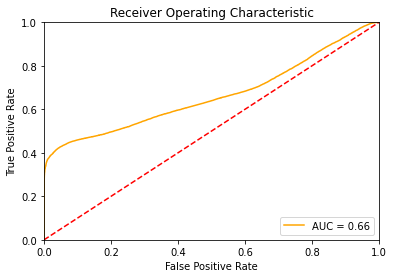

In [ ]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)

In [ ]:
# Using selected features with rbf kernel gave us a poor perfomance of accuracy of 59% which still under perform compare to poly and linear kernel svm

# LOGISTIC REGRESSION with Feature slection

In [ ]:
correlations = df.corr().unstack().sort_values(ascending=False) # Build correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Convert to dataframe
correlations.columns = ['col1', 'col2', 'correlation'] # Label it
correlations.query("col1 == 'IsCorrect' & col2 != 'IsCorrect'") # Filter by variable
# output of this code will give correlation of column v2 with all the other columns

,col1,col2,correlation
165,IsCorrect,poly1_2,0.160933
185,IsCorrect,l_SchemeOfWorkId,0.061216
211,IsCorrect,Perfect_Date,0.039351
226,IsCorrect,poly2_3,0.031779
230,IsCorrect,poly2_5,0.028682
232,IsCorrect,poly2_0,0.028345
233,IsCorrect,HourAnswered,0.028345
242,IsCorrect,YearBirth,0.026438
260,IsCorrect,poly2_1,0.022953
263,IsCorrect,MonthAnswered,0.022953


In [ ]:
new_fea = df[['poly1_2','l_SchemeOfWorkId', 'Perfect_Date', 'YearBirth', 'poly2_3',
             'poly2_0', 'HourAnswered', 'poly2_5', 'poly2_1', 'MonthAnswered',
             'poly2_4','Day of Week Answered', 'poly2_2', 'Age_max_on_yr_mth',
             'Year_Month_int', 'l_QiuzId', 'l_QuestionId']]

In [ ]:

x_new= scaler.fit_transform(new_fea)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 10)

In [ ]:
logistic_model = linear_model.LogisticRegression(class_weight = {0:0.55, 1:0.45}) 
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.55, 1: 0.45})

In [ ]:
print(logistic_model.intercept_)
print(logistic_model.coef_)

[0.05486063]
[[ 0.35804143  0.14665884  0.05242458  0.08733631  0.00385343  0.03632767
   0.03632767  0.01059099  0.0040845   0.0040845  -0.15595323  0.07268267
   0.07268267  0.0373459   0.03192623  0.01909054  0.00560948]]



We can notice that model coefficients look just as they would for an regression model. Also,all the coefficients have the different magnitude indicating this model is likely to no overfit, given the number of features.

Since the logistic regression model outputs probabilities for each class. The class with the highest probability is taken as the score (prediction). The code in the cell below computes and displays a sample of these class probabilities for the test feature set

In [ ]:
probabilities = logistic_model.predict_proba(X_test)
print(probabilities[:15,:])

[[0.4824963  0.5175037 ]
 [0.36303417 0.63696583]
 [0.46823193 0.53176807]
 [0.38530742 0.61469258]
 [0.49060237 0.50939763]
 [0.44734381 0.55265619]
 [0.57048349 0.42951651]
 [0.44226116 0.55773884]
 [0.45162789 0.54837211]
 [0.52904878 0.47095122]
 [0.57582196 0.42417804]
 [0.33907328 0.66092672]
 [0.37668301 0.62331699]
 [0.32626247 0.67373753]
 [0.47917927 0.52082073]]


# LOGISTIC REGRESSION MODEL EVALUATION¶
Now that the class probabilities have been computed these values must be transformed into actual class scores. We can recall that the log likelihoods for two-class logistic regression are computed by applying the sigmoid or logistic transformation to the output of the linear model. The simple choice is to set the threshold between the two likelihoods at  0.5 . The code in the cell below applies this initial threshold to the probability of a score of  0  for the test data. A few examples along with the known labels are then displayed.

In [ ]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15])) #printing the top 15 heads
print(y_test[:15])

[1 1 1 1 1 1 0 1 1 0 0 1 1 1 1]
3307019    1.0
1441939    1.0
831477     0.0
3227063    1.0
2919708    1.0
1814465    1.0
3464736    0.0
1866968    1.0
717294     1.0
1144177    1.0
1550228    1.0
3109061    1.0
3699736    0.0
202316     1.0
3110971    0.0
Name: IsCorrect, dtype: float64


In [ ]:
y_pred_log = logistic_model.predict_proba(X_test)

In [ ]:
#Printing and ploting the metrics result
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = logistic_model.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     11496              8506
Actual negative     11565             13448

Accuracy        0.55
F1 Score        0.57
AUC             0.58
Macro precision 0.56
Macro recall    0.56
 
           Positive      Negative
Num case    20002         25013
Precision    0.50          0.61
Recall       0.57          0.54
F1           0.53          0.57


In [ ]:

scores = score_model(probabilities, 0.5)
 

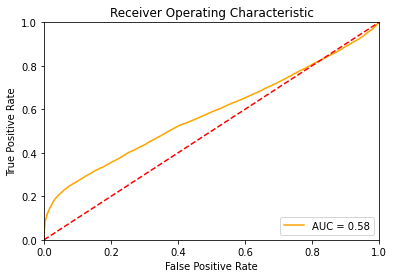

In [ ]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)

In [ ]:
#The Logistic model has a poor accuracy with a poor AUC since any AUC close to 0.5 isnt performing well. i.e Its performing poorly

# NAIVE BAYES CLASSIFIER with highly correlated features

NB_mod = GaussianNB() #for continuous or numerical features.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 10)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB_mod = GaussianNB(var_smoothing = 2e-9)
NB_mod.fit(X_train, y_train)

GaussianNB(var_smoothing=2e-09)

Notice that the Gaussian naive Bayes model object has only one hyperparameter.

In [ ]:
scores = NB_mod.predict(X_test)

In [ ]:
probs = NB_mod.predict_proba(X_test)

In [ ]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     11962              7863
Actual negative      9422             15768

Accuracy        0.62
AUC             0.66
Macro precision 0.61
Macro recall    0.61
 
           Positive      Negative
Num case    19825         25190
Precision    0.56          0.67
Recall       0.60          0.63
F1           0.58          0.65


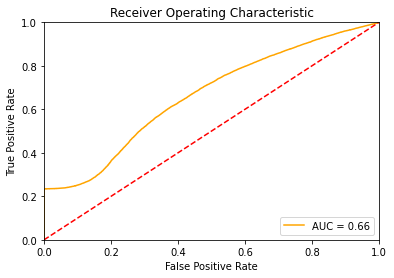

In [ ]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probs) 

In [ ]:
# The GaussianNB() outperform that of the logistic model with an accuracy of 62% and AUC of 0.66

# Bernoulli's NAIVE BAYES with correlated features
NB_mod = BernoulliNB() #for features with binary values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 10)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
NB_mod = BernoulliNB(binarize=0.0)

In [ ]:
NB_mod.fit(X_train, y_train)

BernoulliNB()

In [ ]:
scores = NB_mod.predict(X_test)


In [ ]:
prob = NB_mod.predict_proba(X_test)

In [ ]:
random.seed= 122
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      7666             12159
Actual negative      6626             18564

Accuracy        0.58
AUC             0.66
Macro precision 0.57
Macro recall    0.56
 
           Positive      Negative
Num case    19825         25190
Precision    0.54          0.60
Recall       0.39          0.74
F1           0.45          0.66


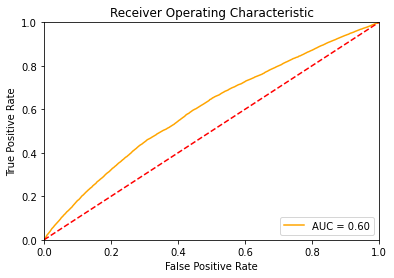

In [ ]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, prob) 

In [ ]:
# The Bernoulli's() under perform that of the GaussianNB with an accuracy of 58% and AUC of 0.60

# DECISION TREE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, preprocessing

In [ ]:
import sklearn.model_selection as ms
inside = ms.KFold(n_splits=2, shuffle = True)
# outside = ms.KFold(n_splits=2, shuffle = True)

In [ ]:

dtree= DecisionTreeClassifier(class_weight = {0:0.55, 1:0.45})

## Define the dictionary for the grid search and the model object to search on
param_grid = [{"max_depth": [2,3,4,5,6], "min_samples_leaf": [3,4,5,6,7]}]
## Define the DecisionTree model

#clf = DecisionTreeClassifier(random_state=0)
clf = ms.GridSearchCV(estimator = dtree, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'accuracy',
                      return_train_score = True)

clf.fit(x_new, y)

GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight={0: 0.55, 1: 0.45}),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6],
                          'min_samples_leaf': [3, 4, 5, 6, 7]}],
             return_train_score=True, scoring='accuracy')

# Print Best Parameter

In [ ]:
print(clf.best_estimator_.max_depth)
#print(clf.best_estimator_.min_samples_split)
print(clf.best_estimator_.min_samples_leaf)

4
3


In [ ]:
print(clf.best_score_)

0.933871161228407


In [ ]:
cv_estimate = ms.cross_val_score(clf, x_new, y) 

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.934
SDT of the metric       = 0.001
Outcomes by cv fold
Fold  1    0.935
Fold  2    0.934
Fold  3    0.936
Fold  4    0.933
Fold  5    0.932


Use best estimator from grid search and calculate accuracy on the training set

In [ ]:
dtree = tree.DecisionTreeClassifier(max_depth = clf.best_estimator_.max_depth,
                  min_samples_leaf = clf.best_estimator_.min_samples_leaf,
                  class_weight = {0:55, 1:0.45}) 
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 55, 1: 0.45}, max_depth=4,
                       min_samples_leaf=3)

In [ ]:
pred =dtree.predict(X_test)

In [ ]:
probs = dtree.predict_proba(X_test)

In [ ]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, pred)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     19861                 0
Actual negative      6367             18787

Accuracy        0.86
AUC             0.94
Macro precision 0.88
Macro recall    0.87
 
           Positive      Negative
Num case    19861         25154
Precision    0.76          1.00
Recall       1.00          0.75
F1           0.86          0.86


In [ ]:
# #probabilities
# probs = dtree.predict_proba(X_test)

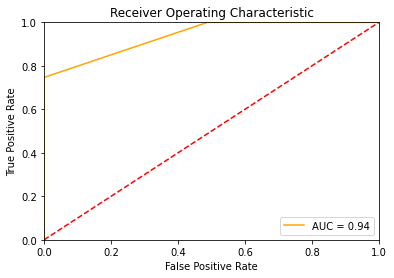

In [ ]:
#Printing AUC
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probs) 

In [ ]:
# Let us examine these results. We should notice the following:

# The confusion matrix has dimension 2X2 and most cases are correctly classified.
# The overall accuracy is 0.86. Since the classes are roughly balanced, this metric indicates relatively good performance of the classifier, particularly since we use hyperparameter tunning and cross validation.
# The precision, recall and F1 for each of the classes is relatively good.
# THE AUC IS CLOSE TO 1 which indicate good results.This Our prform others previously model fairly

# RANDOM FOREST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.45, random_state = 10)

In [ ]:
inside = ms.KFold(n_splits=2, shuffle = True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10)
## Define the dictionary for the grid search and the model object to search on
param_grid = {'n_estimators': [51,100,200,],
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth' : ['None',4,5,6,7,8],
          'criterion' : ['gini']}

clf = ms.GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      scoring = 'accuracy',
                      return_train_score = True)

clf.fit(x_scaled, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'criterion': ['gini'],
                         'max_depth': ['None', 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [51, 100, 200]},
             return_train_score=True, scoring='accuracy')

# Print Best Parameter

In [ ]:
print(clf.best_estimator_.n_estimators)
print(clf.best_estimator_.max_features)
print(clf.best_estimator_.max_depth)
# print(clf.best_estimator_.criterion)

51
auto
4


In [ ]:
print(clf.best_score_)

1.0


In [ ]:
cv_estimate = ms.cross_val_score(clf, x_scaled, y) 

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

Mean performance metric = 1.000
SDT of the metric       = 0.000
Outcomes by cv fold
Fold  1    1.000
Fold  2    1.000
Fold  3    1.000
Fold  4    1.000
Fold  5    1.000


In [ ]:
rf_clf = RandomForestClassifier(max_features = clf.best_estimator_.max_features,
                  max_depth = clf.best_estimator_.max_depth, criterion='gini',
                  class_weight = {0:55, 1:0.45}) 
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 55, 1: 0.45}, max_depth=4)

In [ ]:
pred =rf_clf.predict(X_test)

In [ ]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, pred)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     19861                 0
Actual negative     12790             12364

Accuracy        0.72
F1 Score        0.66
AUC             0.94
Macro precision 0.80
Macro recall    0.75
 
           Positive      Negative
Num case    19861         25154
Precision    0.61          1.00
Recall       1.00          0.49
F1           0.76          0.66


In [ ]:
#probabilities
probs = rf_clf.predict_proba(X_test)

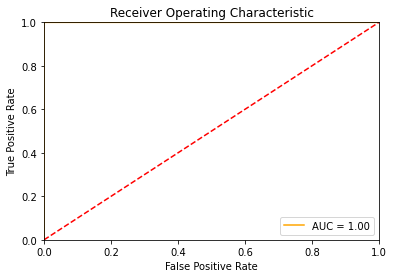

In [ ]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probs)

In [ ]:
# This Model behave quite very good than other model without using feature selection, though it didnt out perform Decision tree model, so we can therefore decides to proceeds to train a random forest with some feature impotance and that should give us a better results because without feature selection we got a mice accuracy of 72% with auc of 0.94

# Gradient Boosting Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 10)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# nr.seed(3456)

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01],
    "max_depth":[3,5],
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"]
    }
#passing the scoring function in the GridSearchCV
gb_clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring='accuracy',refit=False, n_jobs=-1)

gb_clf.fit(x_new, y)



GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'loss': ['deviance'],
                         'max_depth': [3, 5]},
             refit=False, scoring='accuracy')

In [ ]:
gb_clf.best_params_ 

{'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3}

In [ ]:
gb_clf.best_score_

0.9337311946816815

In [ ]:
g_clf = GradientBoostingClassifier(**gb_clf.best_params_)
                                  # , criterion = 'mae', max_features= 'sqrt') 
g_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [ ]:
pred =g_clf.predict(X_test)

In [ ]:
#probabilities
probs = g_clf.predict_proba(X_test)

In [ ]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, pred)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     16941              3006
Actual negative         0             25068

Accuracy        0.93
F1 Score        0.94
AUC             0.98
Macro precision 0.95
Macro recall    0.92
 
           Positive      Negative
Num case    19947         25068
Precision    1.00          0.89
Recall       0.85          1.00
F1           0.92          0.94


In [ ]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probs) 

In [ ]:
# Gradient Boosting algorithm gave a good accuray probably cos it is a variants of ensemble method and it was able to minimize bias error of the model.Since our datset is large and Gradient Boosting  works well with large datasets. We can see that Gradient Boosting Classifier and Bagging method with Decision Tree classifier below gave the same results of 93% accuracy. we can then say this is cos Gradient Boosting classifier has a fixed base estimator i.e a fixed decision tree just the same way the bagging method with DT classifier has a fixed base estimator unlike the Bagging methpod with Naive bayes classifier that gave a very fairly accuracy performance.   

# BAGGING CLASSIFIER WITH DECISION TREEE

In [ ]:
x_new= scaler.fit_transform(new_fea)#Using highly correlated featues gooten through correlation
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 1000)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1))

In [ ]:
pred =model.predict(X_test)

In [ ]:
#probabilities
probs = model.predict_proba(X_test)

In [ ]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, pred)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     17868              1935
Actual negative      1216             23996

Accuracy        0.93
F1 Score        0.94
AUC             0.98
Macro precision 0.93
Macro recall    0.93
 
           Positive      Negative
Num case    19803         25212
Precision    0.94          0.93
Recall       0.90          0.95
F1           0.92          0.94


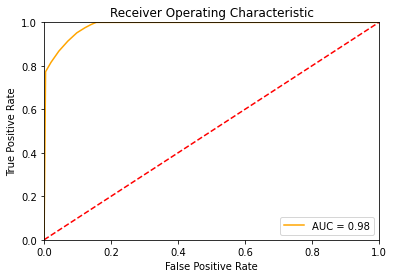

In [ ]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probs) 

In [ ]:
# This Model perform very well than Decision tree model. This has an accuracy of 93% cpompare to decision tree that has 86%.
#We can see that all other metrics in this model is very ok and good.
# This could be cos of the working nature of bagging algorithm that works with an ensemble technique mechanism

# BAGGING CLASSIFIER WITH NAIVE BAYES

In [ ]:
x_new= scaler.fit_transform(new_fea)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 1000)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = BaggingClassifier(GaussianNB(var_smoothing=8e-9))
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(var_smoothing=8e-09))

In [ ]:
pred =model.predict(X_test)

In [ ]:
#probabilities
probs = model.predict_proba(X_test)

In [ ]:
print_metrics(y_test, pred)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     11597              8206
Actual negative      9507             15705

Accuracy        0.61
F1 Score        0.64
AUC             0.65
Macro precision 0.60
Macro recall    0.60
 
           Positive      Negative
Num case    19803         25212
Precision    0.55          0.66
Recall       0.59          0.62
F1           0.57          0.64


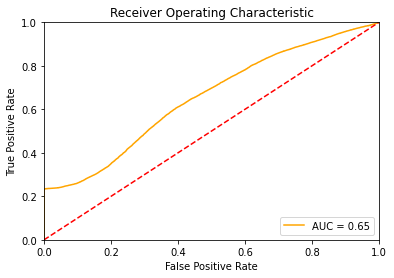

In [ ]:
plot_auc(y_test, probs)

In [ ]:
# This didnt perform like the bagging alorith with decision tree. Obviously Decision tree actually improved the performance of the bagging algorithm

# ADABOOST

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
x_new= scaler.fit_transform(new_fea)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 1000)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.45, random_state = 1000)

In [ ]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,3,5]
             }

In [ ]:
DTC = DecisionTreeClassifier(random_state = 1000, max_features = 'auto', class_weight = {0:55, 1:0.45}, max_depth = 15)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'accuracy')


In [ ]:
grid_search_ABC.fit(x_new, y)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 55,
                                                                                              1: 0.45},
                                                                                max_depth=15,
                                                                                max_features='auto',
                                                                                random_state=1000)),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [1, 2, 3, 5]},
             scoring='accuracy')

In [ ]:
pred =grid_search_ABC.predict(X_test)

In [ ]:
#probabilities
probs =grid_search_ABC.predict_proba(X_test)

In [ ]:
print_metrics(y_test, pred)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     19803                 0
Actual negative      2147             23065

Accuracy        0.95
F1 Score        0.96
AUC             1.00
Macro precision 0.95
Macro recall    0.96
 
           Positive      Negative
Num case    19803         25212
Precision    0.90          1.00
Recall       1.00          0.91
F1           0.95          0.96


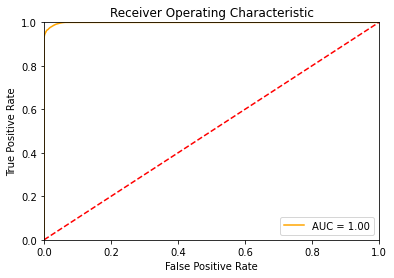

In [ ]:
plot_auc(y_test, probs)

In [ ]:
# Among these classifiers, Adaboost perform very well than any of the models by doing feature selection and also doing grid search hyper parameters

# MY CHOSEN MODEL CATBOOST CLASSIFIER

In [ ]:
x_new= scaler.fit_transform(new_fea)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 1000)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Testing XGBCLASSIFIER
model = XGBClassifier(scale_pos_weight = 8,max_depth = 8, n_estimators = 500)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(f1_score(prediction, y_test))

0.9511479567694432


In [ ]:
#probabilities
probs =model.predict_proba(X_test)

In [ ]:
print_metrics(y_test, prediction)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     17308              2495
Actual negative        86             25126

Accuracy        0.94
F1 Score        0.95
AUC             0.99
Macro precision 0.95
Macro recall    0.94
 
           Positive      Negative
Num case    19803         25212
Precision    1.00          0.91
Recall       0.87          1.00
F1           0.93          0.95


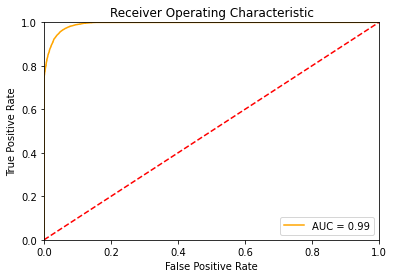

In [ ]:
plot_auc(y_test, probs)

In [ ]:
# XGBClassifier Perform relatively good as well with good metrics  

# ENSEMBLING TECHNIQUES

In [ ]:
x_new= scaler.fit_transform(new_fea)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 1000)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 


In [ ]:
scaler = StandardScaler()
#ann = make_pipeline(scaler, MLPClassifier(solver='lbfgs',max_iter=4))
lr = make_pipeline(scaler, LogisticRegression())
kNN = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=3))
dtree = DecisionTreeClassifier(criterion='entropy')
gnb = make_pipeline(scaler, GaussianNB())
svc = make_pipeline(scaler, SVC())
qda = make_pipeline(scaler, QuadraticDiscriminantAnalysis())

# format required for sklearn stacking
estimator_tups = [('kNN',kNN),('dtree', dtree),('gnb',gnb),
                  ('lr',lr), ('SVC', svc), ('QDA', qda)]

In [ ]:
Ensemble = VotingClassifier(estimators=estimator_tups)

In [ ]:
for clf, label in zip([lr, kNN, dtree,gnb,svc,qda], ['Logistic Regression', 'kNN', 'dtree', 'gnb','svc','qda','Ensemble']):
  scores = cross_val_score(clf, x_new, y, scoring='accuracy', cv=2)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.55 (+/- 0.00) [Logistic Regression]
Accuracy: 0.61 (+/- 0.00) [kNN]
Accuracy: 0.93 (+/- 0.00) [dtree]
Accuracy: 0.61 (+/- 0.01) [gnb]
Accuracy: 0.62 (+/- 0.00) [svc]


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.54 (+/- 0.01) [qda]


In [ ]:
Ensemble.fit(x_new, y)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


VotingClassifier(estimators=[('kNN',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier(n_neighbors=3))])),
                             ('dtree',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('gnb',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('gaussiannb', GaussianNB())])),
                             ('lr',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression())])),
  

In [ ]:
preds=Ensemble.predict(X_test)

In [ ]:
# #probabilities
# probs =Ensemble.predict_proba(X_test)

In [ ]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores))
    # print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, preds)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     18740              1194
Actual negative      9682             15399

Accuracy        0.76
F1 Score        0.74
Macro precision 0.79
Macro recall    0.78
 
           Positive      Negative
Num case    19934         25081
Precision    0.66          0.93
Recall       0.94          0.61
F1           0.78          0.74


In [ ]:
plot_auc(y_test, probs)

In [ ]:
# Ensembling Method seems to perform well by reducing model possibilities of bias with an acuuracy of 76% though the precision of 1 is quite low definietely there is a litle error in classification of 1

# COMPARING MODELS METRICS

           Liner SVM  RBF SVM  Poly SVM  Logistic Reg  Gaussian NB  \
Accuracy        0.67      1.0      0.73          0.56         0.58   
Precision       0.73      1.0      0.77          0.56         0.57   
Recall          0.70      1.0      0.75          0.56         0.61   
F1-Score        0.67      1.0      0.73          0.55         0.61   
ROC             0.83      1.0      0.84          0.58         0.66   

           Bernoulli NB  Decision Tree  Random Forest  Gradient Boosting  \
Accuracy           0.58           0.86           0.72               0.93   
Precision          0.57           0.88           0.80               0.95   
Recall             0.56           0.87           0.75               0.92   
F1-Score           0.55           0.86           0.66               0.94   
ROC                0.60           0.94           0.94               0.98   

           Bagging Classifier Dtree  Bagging Classifier NB  AdaBoosting  \
Accuracy                       0.93            

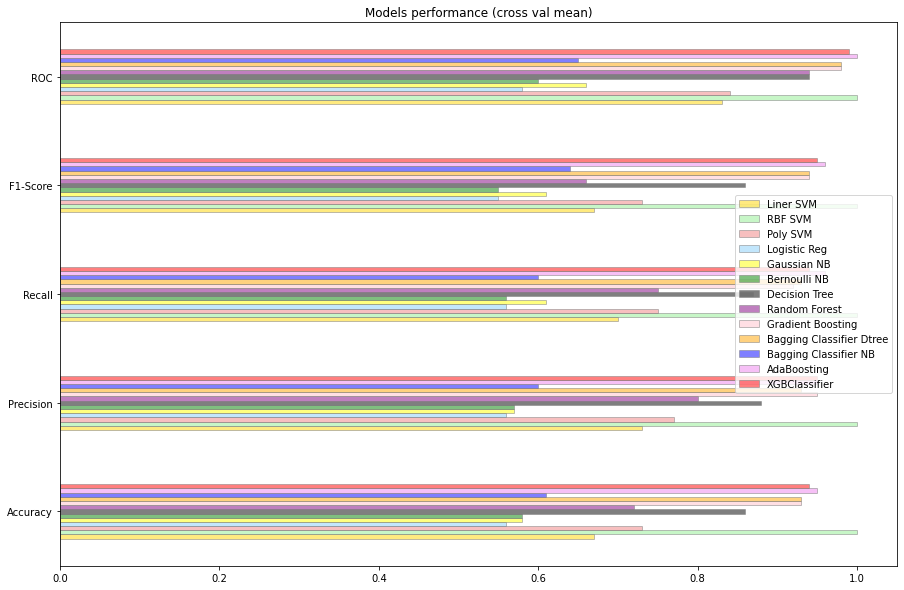

In [ ]:
models_metrics = {'Liner SVM': [0.67, 0.73, 0.70,0.67,0.83],
                'RBF SVM': [1.0, 1.0, 1.0, 1.0,1.0],
                 'Poly SVM': [0.73, 0.77, 0.75, 0.73,0.84],
                 'Logistic Reg': [0.55, 0.56, 0.56, 0.55,0.58],
                 'Gaussian NB': [0.58, 0.57, 0.61, 0.61,0.66],
                 'Bernoulli NB': [0.58, 0.57, 0.56, 0.55,0.60],
                 'Decision Tree': [0.86, 0.88, 0.87, 0.86,0.94],
                 'Random Forest': [0.72, 0.80, 0.75, 0.66,0.94],
                 'Gradient Boosting': [0.93, 0.95, 0.92, 0.94,0.98],
                 'Bagging Classifier Dtree': [0.93, 0.93, 0.93, 0.94,0.98],
                 'Bagging Classifier NB': [0.61, 0.60, 0.60, 0.64,0.65],
                 'AdaBoosting': [0.95, 0.95, 0.96, 0.96,1.0],
                 'XGBClassifier' : [0.94, 0.95, 0.94, 0.95,0.99]
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall', 3: 'F1-Score', 4: 'ROC'}, 
                 inplace=True)
print(df)
df.plot(kind='barh', figsize = (15,10), ylim = (0.94, 1), 
        color = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue','yellow', 'green','black','purple','pink','orange','blue','violet','red'],
        rot = 0, title ='Models performance (cross val mean)',
        edgecolor = 'grey', alpha = 0.5)
#for p in ax.patches:
    #ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

So In terms of Accuracy and other metrics performances, Adaboosting Perform greatly well than any other model then followed by XGBCLASSIFIER and then Bagging classifier and then Decision tree classifer as seen in the graph above.

So Adaboost classifier will help us classify IsCorrect perfectly with an accuracy of 95%

# best model


Adaboosting Classifier gave me the best model having an accuracy of 95%.
This was done using feature selections. The Feature selection techniwue used was the pearson correlation which helps to get most correlated features with the target variable called IsCorrect.

After selecting most correlated features, then i used decision tree estimators to get best model with hyperparameters tuning that help to optimize my model training and learning.
those hyperparameters used are ;
Criterion, splitter, n_estimators, max_features, class_weight, max_depth

I then performed grid search on this hyperparameter to obtain optimal results. the parameter passes are ;

parameter= {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,3,5]}
After performing this grid search, my accuracy result was very low (83%) with max_depth of 3  So i kept tuning the max_depth to a value of 15 which then gave me accuracy of 95%



# ADABOOSTING ARCHITECTURE
AdaBoost also called Adaptive Boosting is a technique in Machine Learning used as an Ensemble Method. The most common algorithm used with AdaBoost is decision trees with one level that means with Decision trees with only 1 split. These trees are also called Decision Stumps.

What this algorithm does is that it builds a model and gives equal weights to all the data points. It then assigns higher weights to points that are wrongly classified. Now all the points which have higher weights are given more importance in the next model. It will keep training models until and unless a lowe error is received.

STEP1. First of all our data points will be assigned some weights. Initially, all the weights will be equal.

SEP 2; We start by seeing how well each feature classifies the samples.
Then we’ll create a decision stump for each of the features and then calculate the Gini Index of each tree. The tree with the lowest Gini Index will be our first stump.

Step 3 Then it now calculate the “Amount of Say” or “Importance” or “Influence” for this classifier in classifying the datapoints using some formula:
The total error is nothing, but the summation of all the sample weights of misclassified data points.

Step 4 – Once the Total Error has been calculated as well as the  and performance of a stump. Then  it will start update the weights because if the same weights are applied to the next model, then the output received will be the same as what was received in the first model.

The wrong predictions will be given more weight whereas the correct predictions weights will be decreased. So the next model will be  build after updating the weights, more preference will be given to the points with higher weights.
Then it finds the importance of the classifier and total error needed to finally update the weights.

Step 5 – It then make a new dataset to see if the errors decreased or not. In doing this it  will remove the “sample weights” and “new sample weights” column and then based on the “new sample weights” it will divide the data points into buckets.

Step 6 – the algorithm does selects random numbers from 0-1. Since incorrectly classified records have higher sample weights, the probability to select those records is alway very high.
Suppose the 5 random numbers our algorithm take is 0.38,0.26,0.98,0.40,0.55.
These random numbers fall in the bucket and according to it, and will make a new dataset. This comes out to be our new dataset.

Step 7 – Now this act as our new dataset and we need to repeat all the above steps i.e.

1.Assign equal weights to all the datapoints
2.Find the stump that does the best job classifying the new collection of samples by finding their Gini Index and selecting the one with the lowest Gini index
3.Calculate the “Amount of Say” and “Total error” to update the previous sample weights.
4.Normalize the new sample weights.
The algorithm Iterate through these steps until and unless a low training error is achieved.

Suppose with respect to our dataset we have constructed 3 decision trees (DT1, DT2, DT3) in a sequential manner. If we send our test data now it will pass through all the decision trees and finally, we will see which class has the majority, and based on that we will do predictions for our test dataset.
